<a href="https://colab.research.google.com/github/Abduaziz3455/Datasets/blob/main/Ticket_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy Dataset from kaggle to colab

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abduazizabduraxmonov","key":"07e7aa5d8601cd0cbf6d2a783857e511"}'}

In [3]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c aviachipta-narxini-bashorat-qilish
! unzip aviachipta-narxini-bashorat-qilish.zip

  0% 0.00/382k [00:00<?, ?B/s]
100% 382k/382k [00:00<00:00, 93.3MB/s]
Archive:  aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


## Libraries

In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
df = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_sol = pd.read_csv('sample_solution.csv')
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


# **Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [7]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [8]:
df.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.sample(10)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
12358,12359,AirAsia,I5-631,Mumbai,Morning,one,Evening,Delhi,Economy,8.00,27,2336
9202,9203,Indigo,6E-5389,Bangalore,Evening,zero,Evening,Mumbai,Economy,1.83,25,2201
7398,7399,Vistara,UK-659,Hyderabad,Morning,one,Evening,Delhi,Economy,5.50,13,10701
14478,14479,Indigo,6E-2169,Delhi,Evening,zero,Night,Chennai,Economy,2.92,16,2637
16115,16116,GO_FIRST,G8-7546,Mumbai,Evening,one,Late_Night,Hyderabad,Economy,6.08,44,3282
15623,15624,Vistara,UK-864,Bangalore,Evening,one,Late_Night,Delhi,Business,5.92,45,42521
19792,19793,Vistara,UK-836,Chennai,Morning,one,Evening,Bangalore,Business,6.25,32,60260
11200,11201,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,17,19412
13424,13425,Indigo,6E-152,Delhi,Morning,two_or_more,Night,Chennai,Economy,10.83,7,18980
10681,10682,Vistara,UK-877,Mumbai,Morning,two_or_more,Evening,Kolkata,Economy,8.83,38,13947


In [11]:
df.drop('flight', axis=1, inplace=True)
test.drop('flight', axis=1, inplace=True)

In [12]:
# flight duration
df.groupby(['source_city', 'destination_city']).mean()[['duration']]

<ipython-input-12-9f40000f89bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['source_city', 'destination_city']).mean()[['duration']]


duration
source_city destination_city           
Bangalore   Chennai           14.234123
            Delhi              9.635238
            Hyderabad         13.864560
            Kolkata           13.077205
            Mumbai            11.244224
Chennai     Bangalore         13.757919
            Delhi             11.115138
            Hyderabad         12.941042
            Kolkata           14.551314
            Mumbai            12.173815
Delhi       Bangalore         10.471932
            Chennai           11.953548
            Hyderabad         12.360000
            Kolkata           13.166572
            Mumbai            10.479286
Hyderabad   Bangalore         11.831633
            Chennai           12.920774
            Delhi             10.732483
            Kolkata           13.589907
            Mumbai            11.970486
Kolkata     Bangalore         13.888145
            Chennai           14.903518
            Delhi             11.134613
            Hyderabad         13.554959
            Mumbai            13.042959
Mumbai      Bangalore         11.676228
            Chennai           12.407945
            Delhi              9.955339
            Hyderabad         12.658580
            Kolkata           13.249138

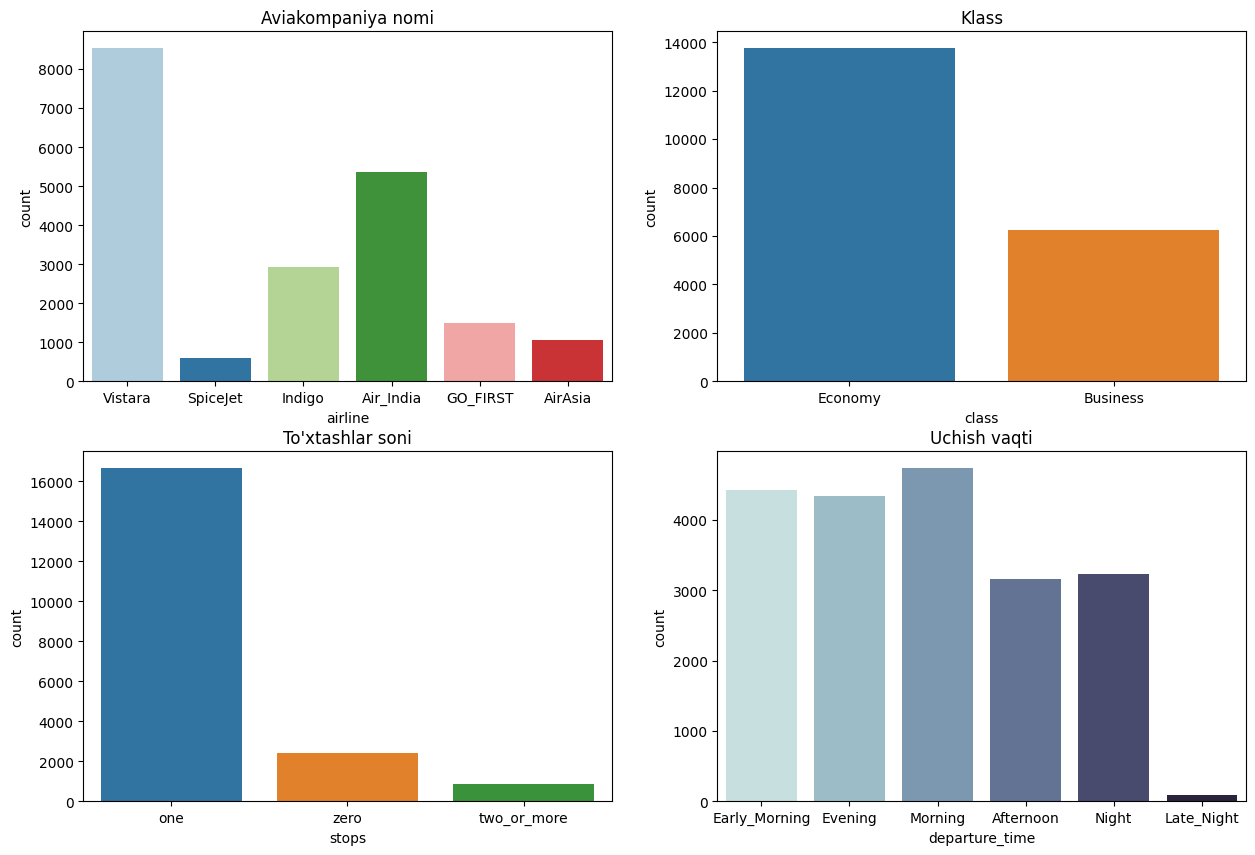

In [13]:
# airline, source_city, departure_time, stops, destination_city, class
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x=df['airline'], ax=axes[0, 0], palette='Paired')
axes[0, 0].set_title('Aviakompaniya nomi')
sns.countplot(x=df['class'], ax=axes[0, 1])
axes[0, 1].set_title('Klass')
sns.countplot(x=df['stops'], ax=axes[1, 0], palette='tab10')
axes[1, 0].set_title("To'xtashlar soni")
sns.countplot(x=df['departure_time'], ax=axes[1, 1], palette='ch:start=.2,rot=-.3')
axes[1, 1].set_title('Uchish vaqti')
plt.show()

# ***Preparing to ML***

In [14]:
# get numerical and categorical values
nums = list(df._get_numeric_data().columns)
cats = list(set(df.columns) - set(nums))
print(nums)
print(cats)
df.head()

['id', 'duration', 'days_left', 'price']
['departure_time', 'destination_city', 'arrival_time', 'source_city', 'stops', 'class', 'airline']


,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [15]:
train_set, test_set = train_test_split(df, test_size=0.001, random_state=42)
X_train = train_set.drop(["price"], axis=1)
y = train_set["price"].copy()

In [16]:
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [17]:
num_attribs =  list(X_train[['days_left', 'duration']].copy())
cat_attribs = ['airline',
               'source_city',
               'departure_time',
               'arrival_time',
               'stops',
               'class',
               'destination_city']


full_pipeline = ColumnTransformer([
     ('num', num_pipeline, num_attribs),
     ('cat', OneHotEncoder(), cat_attribs)
])

## **Machine Learning**

In [18]:
X_prepared = full_pipeline.fit_transform(X_train)

LR_model = LinearRegression()

LR_model.fit(X_prepared, y)

LinearRegression()

In [19]:
test_data = X_train.sample(5)
test_data

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
19338,19339,Air_India,Bangalore,Afternoon,one,Evening,Kolkata,Economy,5.83,39
13192,13193,Vistara,Kolkata,Early_Morning,one,Night,Chennai,Economy,15.58,29
4089,4090,Vistara,Bangalore,Evening,one,Morning,Kolkata,Economy,15.25,18
4461,4462,Air_India,Bangalore,Morning,one,Night,Hyderabad,Business,13.17,48
17055,17056,Air_India,Kolkata,Early_Morning,one,Night,Delhi,Economy,16.17,22


In [20]:
test_label = y.loc[test_data.index]
test_label

19338     7004
13192     5910
4089      6534
4461     56476
17055     5093
Name: price, dtype: int64

In [21]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

<5x37 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [22]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([ 5105.03712099, 11995.1353664 , 12770.36920238, 47110.40404322,
        7730.25887889])

In [23]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
19338,5105.037121,7004
13192,11995.135366,5910
4089,12770.369202,6534
4461,47110.404043,56476
17055,7730.258879,5093


In [24]:
X_test = test_set.drop('price', axis=1)
X_test

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
10650,10651,GO_FIRST,Hyderabad,Morning,one,Night,Delhi,Economy,13.58,49
2041,2042,Vistara,Delhi,Evening,one,Morning,Bangalore,Business,16.08,9
8668,8669,Vistara,Delhi,Evening,one,Morning,Chennai,Business,15.08,9
1114,1115,Vistara,Mumbai,Afternoon,one,Morning,Bangalore,Business,16.92,17
13902,13903,Air_India,Mumbai,Afternoon,one,Night,Chennai,Economy,7.58,21
11963,11964,AirAsia,Delhi,Morning,one,Evening,Bangalore,Economy,8.25,21
11072,11073,Air_India,Hyderabad,Early_Morning,one,Evening,Mumbai,Business,13.50,15
3002,3003,Air_India,Delhi,Morning,one,Morning,Hyderabad,Economy,23.08,27
19771,19772,Indigo,Bangalore,Evening,one,Night,Delhi,Economy,7.42,22
8115,8116,Air_India,Bangalore,Night,one,Afternoon,Chennai,Business,15.67,20


In [25]:
y_test = test_set['price'].copy()
y_test

10650     5361
2041     50297
8668     60232
1114     74365
13902     4417
11963     3090
11072    45883
3002      5939
19771     4704
8115     60396
3525      5040
7879      6548
16441     4792
16296     4715
12566     8107
5252     10680
19393     2150
16796     4257
8094     56040
322      11353
Name: price, dtype: int64

In [41]:
def rmse(y_predicted):
    print(np.sqrt(mean_squared_error(y_test, y_predicted)))
    print(mean_absolute_error(y_test, y_predicted))

X_test_prepared = full_pipeline.transform(X_test)

# LinearRegression algorithm
y_predicted = LR_model.predict(X_test_prepared)
rmse(y_predicted)

5816.687522311333
4294.187092100923


In [27]:
def result(model):
  model.fit(X_prepared, y)
  y_predicted = model.predict(X_test_prepared)
  rmse(y_predicted)

for i in [DecisionTreeRegressor(), RandomForestRegressor()]:
  print(i)
  result(i)

DecisionTreeRegressor()
3628.2488406943644
2053.25
RandomForestRegressor()
1827.808450656141
1010.4890000000003


In [28]:
# best choice
model = RandomForestRegressor().fit(X_prepared, y)

In [37]:
test_prepared = full_pipeline.transform(test)

sub_predicted = model.predict(test_prepared)

In [38]:
sample_sol.head()

,id,price
0,1,53269.96
1,2,57243.10
2,3,23215.46
3,4,2626.11
4,5,5754.83


In [39]:
sample_sol['price'] = sub_predicted
sample_sol.set_index('id')

,price
id,
1,53269.96
2,57243.10
3,23215.46
4,2626.11
5,5754.83
...,...
4996,59192.30
4997,4518.91
4998,50144.91


In [40]:
sample_sol.to_csv('submission.csv', index=False)